In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json

### Font

In [2]:
# font_24 = {'family': 'DejaVu Sans',
#         'color':  'black',
#         'size': 24,
#         }

# font_32 = {'family': 'DejaVu Sans',
#         'color':  'black',
#         'size': 32,
#         }

font_16 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

font_12 = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 12,
        }

# Color

(0.5, 2)

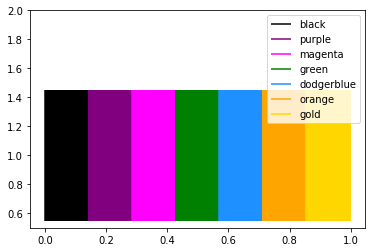

In [5]:
# digonto vai nature paper
colors = ['black', 'magenta', 'green', 'deepskyblue', 'orange']

# ok 1
colors = ['black', 'purple', 'magenta', 'green', 'dodgerblue', 'orange', 'gold']

spikes = np.linspace(0, 1, 2000)
size=spikes.shape[0]//len(colors)

for a in range(len(colors)):
    plt.eventplot(spikes[a*size:(a+1)*size], orientation='horizontal', linelengths=0.9, color = colors[a], label=colors[a])
    pass
# plt.show()
plt.legend()
plt.ylim([0.5,2])

## defined fundtions

### directories

In [3]:
out_img_dir = "./graphs/"
out_data_dir = "./results/"
in_data_dir = "./data/periodic/"
calculated_data = "./calculated_data/"

#### signatures

In [4]:
all_signatures = ['sq_lattice_site_percolation_non_periodic_',
                  'sq_lattice_site_percolation_periodic_',

                  'sq_lattice_site_percolation_ballistic_deposition_L1_non_periodic_',
                  'sq_lattice_site_percolation_ballistic_deposition_L1_periodic_',

                  'sq_lattice_site_percolation_ballistic_deposition_L2_non_periodic_',
                  'sq_lattice_site_percolation_ballistic_deposition_L2_periodic_']

In [5]:
signature = 'sq_lattice_site_percolation_periodic__entropy_by_site_'
#signature = "sq_lattice_site_percolation_periodic__entropy_by_site__entropy_by_site_combined_L*.txt_convolved.txt"
files = glob.glob(in_data_dir + signature + '*')

# print("chosen signature")
print(signature)

sq_lattice_site_percolation_periodic__entropy_by_site_


In [6]:
files

['./data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_350_2018.7.25_23.15.6.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_400_2018.7.26_11.48.57.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_300_2018.7.25_23.13.38.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_150_2018.7.25_15.44.46.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_350_2018.7.26_7.29.41.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_300_2018.7.26_1.17.38.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_350_2018.7.25_23.15.4.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_400_2018.7.26_8.14.5.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_400_2018.7.26_3.25.18.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__entropy_by_site_300_2018.7.25_20.41.28.txt

### defined constants

In [7]:
pc = 0.5927
one_by_nu = 0.75

In [7]:
data = dict()
ensembles = dict()
for file in files:
    f = open(file)
    l = f.readline()
    header = json.loads(l)
    print(header)
    L = int(header['length'])
    ensmbl = int(header['ensemble_size'])
    if L in ensembles:
        ensembles[L] += ensmbl
    else:
        ensembles[L] = ensmbl

    p, H= np.loadtxt(file, usecols=(0,1), skiprows=1, unpack=True)
    if L in data:
        data[L] += ensmbl*np.array([p, H]).T
    else:
        data[L] = ensmbl*np.array([p, H]).T
        
    pass

        
#### taking average
for L in ensembles.keys():
    data[L] = data[L]/ensembles[L]      
    pass

{'length': 350, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 150, 'ensemble_size': 500, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 350, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 400, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_periodic_'}
{'length': 300, 'ensemble_size': 200, 'signature': 'sq_lattice_site_percolation_

In [8]:
ensembles

{350: 1200, 400: 800, 300: 1600, 150: 1000, 200: 1000, 100: 1000, 250: 1000}

Text(0,0.5,'Entropy, $H(p,L)$')

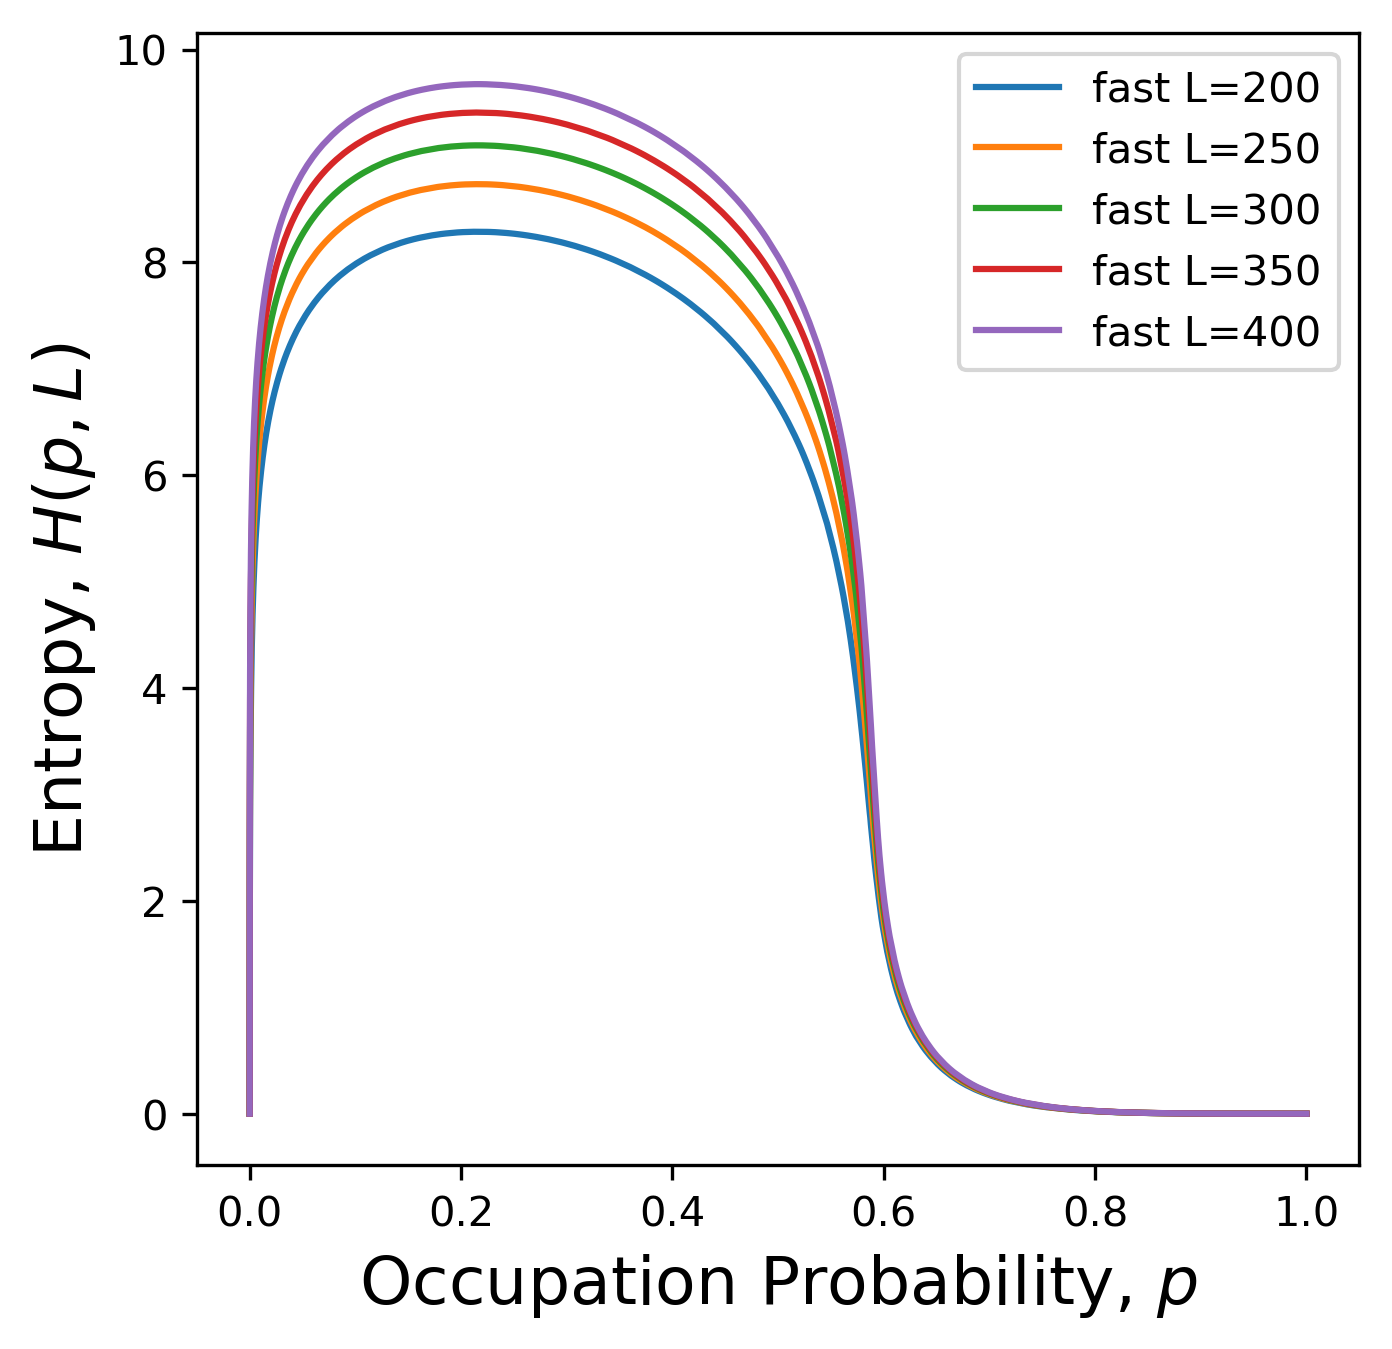

In [9]:
fig = plt.figure(figsize=(5,5), dpi=300)
lengths = np.sort(list(data.keys()))
for L in lengths:
    if L < 200:
        continue
    x, y1 = data[L].T
#     plt.plot(x, y1, label='L={}'.format(L))
    plt.plot(x, y1, label='fast L={}'.format(L))
    
    pass

plt.legend()
# plt.xlim(0, 1)
# plt.ylim(-0.02, 13)
plt.xlabel(r'Occupation Probability, $p$', font)
plt.ylabel(r"Entropy, $H(p,L)$", font)

## Write combine data to file for convolution

In [19]:
# ensemble_size = 10000
# for L in data.keys():
#     if ensembles[L] < ensemble_size:
#         print("for L={} not enough realizations".format(L))
#         continue
#     x = data[L]
#     header = {'length':L, 'ensemble_size':ensembles[L]}
#     s = json.dumps(header)
#     s += '\n'
#     s += '#<p>\t<H>'
#     f = out_data_dir + signature + '_combined_L{}.txt'.format(L)
#     np.savetxt(f, x, header=s, comments='')
    
#     pass

### Output Graphs

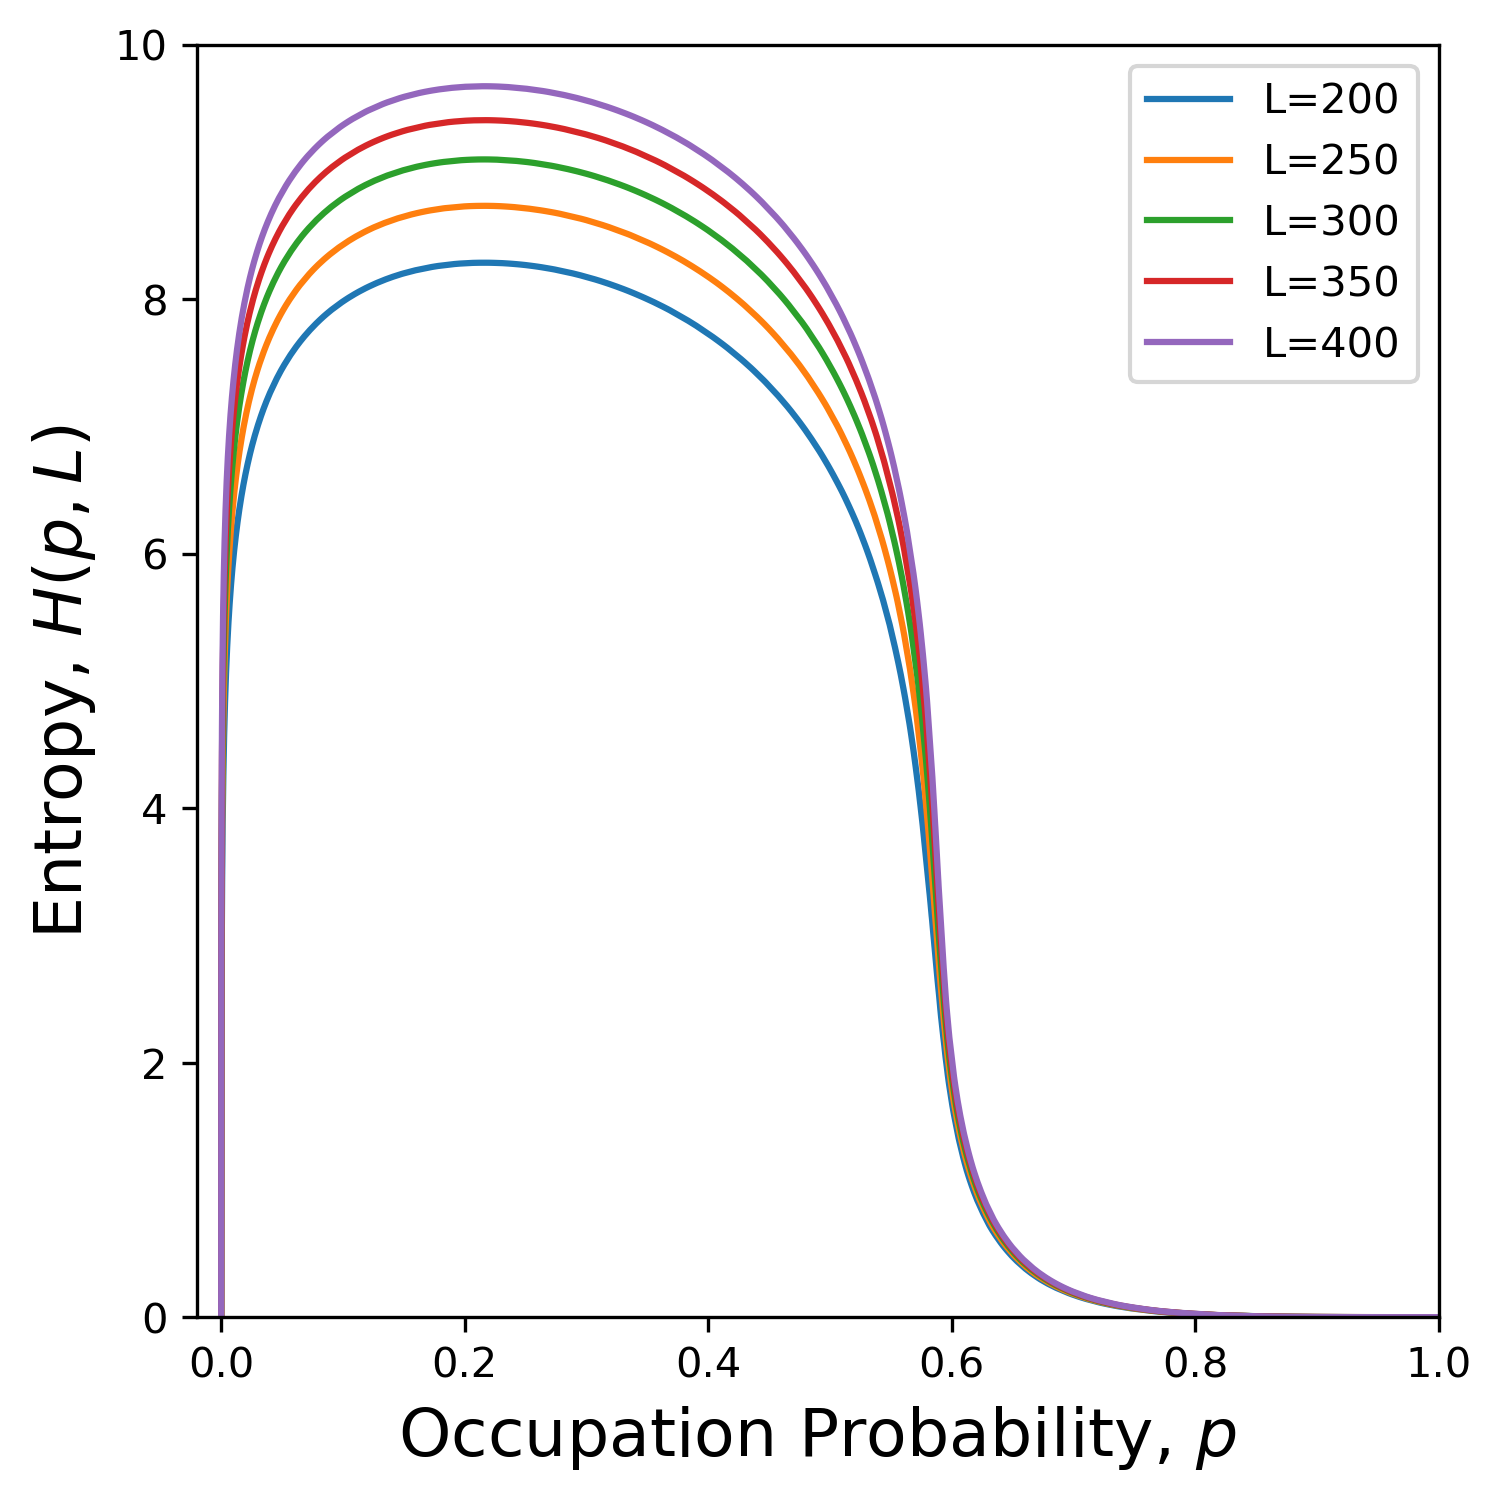

In [11]:
fig = plt.figure(figsize=(5,5), dpi=300)
lengths = np.sort(list(data.keys()))
for L in lengths:
    if L < 200:
        continue
    x, y1 = data[L].T
    plt.plot(x, y1, label='L={}'.format(L))
    
    pass

plt.legend()
plt.xlim(-0.02, 1)
plt.ylim(0, 10)
plt.xlabel(r'Occupation Probability, $p$', font)
plt.ylabel(r"Entropy, $H(p,L)$", font)
fig.tight_layout(pad=0.7)
filename = out_img_dir + signature + '-entropy.eps'
plt.savefig(filename)